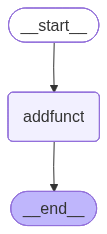

In [3]:
# Import necessary modules from langgraph and typing
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

# Define a TypedDict to describe the structure of our state data
class AddState(TypedDict):
    a: int  # First input number
    b: int  # Second input number
    c: int  # Result of the multiplication (output)

# Create a new state graph using the defined state structure
graph = StateGraph(AddState)

# Define a function that performs the main computation
def addfunct(state: AddState) -> AddState:
    """
    Multiplies 'a' and 'b' from the state and stores the result in 'c'.
    Returns the updated state.
    """
    a = state['a']
    b = state['b']
    c = a * b  # Perform multiplication
    state['c'] = c  # Store result in the state
    return state

# Add the computation function as a node in the graph
graph.add_node("addfunct", addfunct)

# Define the workflow connections:
# - Start from START node
# - Go to 'addfunct' node
# - End at END node
graph.add_edge(START, "addfunct")
graph.add_edge("addfunct", END)

# Compile the workflow graph into an executable workflow
workflow = graph.compile()
# Invoke the workflow with input values for 'a' and 'b'
result = workflow.invoke({"a": 40, "b": 40})

from IPython.display import Image

# Call the method to get the PNG bytes
Image(workflow.get_graph().draw_mermaid_png())